# Convolutional Neural Networks

## Machine learning on images

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### MNIST

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('mnist.npz')

11490434/11490434 [==============================] - 11s 1us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[-1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

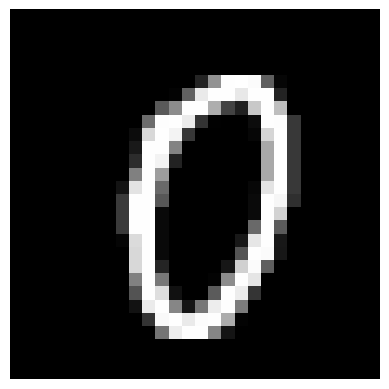

In [8]:
plt.imshow(X_train[1000], cmap='gray')
plt.axis(False)
plt.show()

In [9]:
y_train[1000]

0

In [10]:
#right now each image is (28 x 28) >> reshaped to (1,28*28)= (1,784)

# reshaped X_train >> (60000, 784)
# reshaped X_test >> (10000, 784)

In [11]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [12]:
X_train.shape

(60000, 784)

In [13]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
y_train[0]

5

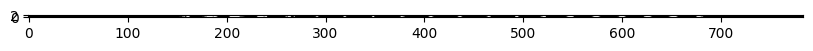

In [17]:
plt.figure(figsize=(10,6))
plt.imshow((255*X_train[0]).astype('uint8').reshape(1,-1), cmap='gray')
plt.ylim([0,2])
plt.savefig('dummyname.jpg', dpi=300)

In [23]:
type(y_train[-1])

numpy.uint8

In [24]:
y_train[-1]

8

In [25]:
y_train.shape

(60000,)

In [26]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [27]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
y_train_cat.shape

(60000, 10)

In [29]:
y_test_cat.shape

(10000, 10)

### Fully connected on images

In [30]:
28*28

784

In [31]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

In [33]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [34]:
128*32 + 32

4128

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 570602 (2.18 MB)
Trainable params: 570602 (2.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10


329/329 [==============================] - 4s 9ms/step - loss: 0.3515 - accuracy: 0.8911 - val_loss: 0.1990 - val_accuracy: 0.9432
Epoch 2/10
329/329 [==============================] - 3s 10ms/step - loss: 0.1145 - accuracy: 0.9648 - val_loss: 0.1292 - val_accuracy: 0.9606
Epoch 3/10
329/329 [==============================] - 4s 11ms/step - loss: 0.0728 - accuracy: 0.9773 - val_loss: 0.1022 - val_accuracy: 0.9716
Epoch 4/10
329/329 [==============================] - 3s 8ms/step - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.1004 - val_accuracy: 0.9738
Epoch 5/10
329/329 [==============================] - 3s 9ms/step - loss: 0.0354 - accuracy: 0.9896 - val_loss: 0.1566 - val_accuracy: 0.9631
Epoch 6/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.1093 - val_accuracy: 0.9724
Epoch 7/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.1311 - val_accuracy: 0.9715


Text(0.5, 0, 'Epochs')

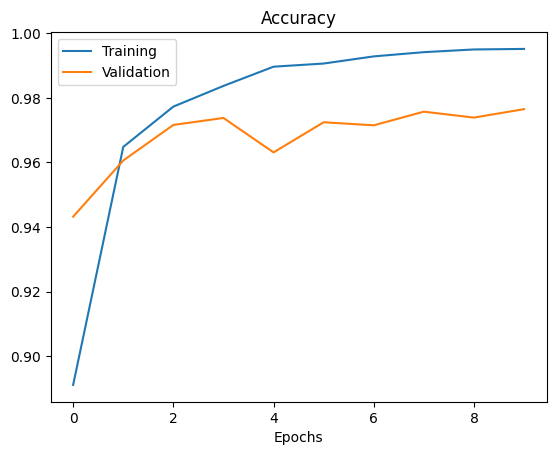

In [37]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [38]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9781


0.9781000018119812

### Tensor Math

In [39]:
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [40]:
A

array([[[[4, 9, 6, 0, 5],
         [5, 7, 5, 7, 6],
         [1, 8, 0, 6, 1],
         [2, 5, 9, 6, 7]],

        [[3, 9, 1, 8, 5],
         [8, 6, 3, 0, 6],
         [5, 2, 9, 1, 3],
         [1, 4, 9, 9, 0]],

        [[2, 0, 6, 1, 7],
         [2, 8, 8, 6, 7],
         [4, 2, 3, 3, 6],
         [0, 4, 0, 4, 6]]],


       [[[5, 3, 9, 8, 9],
         [2, 4, 7, 1, 6],
         [6, 8, 1, 8, 6],
         [9, 1, 0, 0, 5]],

        [[9, 0, 9, 2, 0],
         [7, 1, 4, 5, 1],
         [8, 7, 8, 2, 7],
         [6, 6, 0, 7, 5]],

        [[8, 1, 4, 8, 0],
         [0, 3, 0, 2, 0],
         [6, 6, 1, 0, 3],
         [7, 9, 8, 0, 6]]]])

In [41]:
A[0, 1, 0, 3]

8

In [42]:
B

array([[9, 4, 5],
       [2, 9, 6]])

#### A random colored image

In [43]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[ 36, 197, 133],
        [186,  40, 178],
        [146, 182,  78],
        [ 82,  28, 174]],

       [[ 64, 162, 223],
        [118,  47,  51],
        [223,  85, 127],
        [140, 145, 170]],

       [[216,  77,  34],
        [ 91, 211, 127],
        [219, 132,  42],
        [160, 250, 177]],

       [[ 21, 213, 249],
        [107,  60, 167],
        [171, 103,   9],
        [158, 196,  70]]], dtype=uint8)

Text(0.5, 1.0, 'Blue channel')

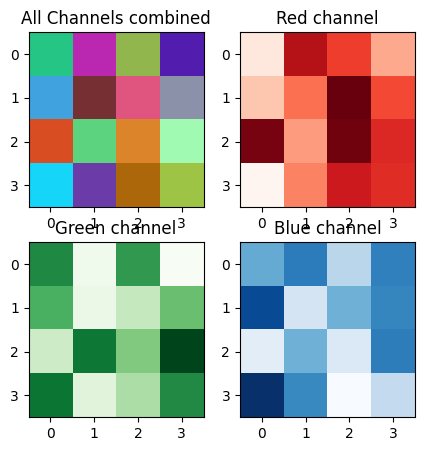

In [44]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

### Tensor operations

In [45]:
2 * A

array([[[[ 8, 18, 12,  0, 10],
         [10, 14, 10, 14, 12],
         [ 2, 16,  0, 12,  2],
         [ 4, 10, 18, 12, 14]],

        [[ 6, 18,  2, 16, 10],
         [16, 12,  6,  0, 12],
         [10,  4, 18,  2,  6],
         [ 2,  8, 18, 18,  0]],

        [[ 4,  0, 12,  2, 14],
         [ 4, 16, 16, 12, 14],
         [ 8,  4,  6,  6, 12],
         [ 0,  8,  0,  8, 12]]],


       [[[10,  6, 18, 16, 18],
         [ 4,  8, 14,  2, 12],
         [12, 16,  2, 16, 12],
         [18,  2,  0,  0, 10]],

        [[18,  0, 18,  4,  0],
         [14,  2,  8, 10,  2],
         [16, 14, 16,  4, 14],
         [12, 12,  0, 14, 10]],

        [[16,  2,  8, 16,  0],
         [ 0,  6,  0,  4,  0],
         [12, 12,  2,  0,  6],
         [14, 18, 16,  0, 12]]]])

In [46]:
A + A

array([[[[ 8, 18, 12,  0, 10],
         [10, 14, 10, 14, 12],
         [ 2, 16,  0, 12,  2],
         [ 4, 10, 18, 12, 14]],

        [[ 6, 18,  2, 16, 10],
         [16, 12,  6,  0, 12],
         [10,  4, 18,  2,  6],
         [ 2,  8, 18, 18,  0]],

        [[ 4,  0, 12,  2, 14],
         [ 4, 16, 16, 12, 14],
         [ 8,  4,  6,  6, 12],
         [ 0,  8,  0,  8, 12]]],


       [[[10,  6, 18, 16, 18],
         [ 4,  8, 14,  2, 12],
         [12, 16,  2, 16, 12],
         [18,  2,  0,  0, 10]],

        [[18,  0, 18,  4,  0],
         [14,  2,  8, 10,  2],
         [16, 14, 16,  4, 14],
         [12, 12,  0, 14, 10]],

        [[16,  2,  8, 16,  0],
         [ 0,  6,  0,  4,  0],
         [12, 12,  2,  0,  6],
         [14, 18, 16,  0, 12]]]])

In [47]:
A.shape

(2, 3, 4, 5)

In [48]:
B.shape

(2, 3)

In [49]:
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[197, 129, 211, 119, 118],
       [154, 162, 147, 152, 134],
       [169, 205, 131, 107, 144],
       [136, 191, 165, 173, 184]])

In [50]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

### 1D convolution

In [51]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [52]:
b = np.array([-1, 1], dtype='float32')

In [53]:
c = np.convolve(a, b)

In [54]:
a

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [55]:
b

array([-1.,  1.], dtype=float32)

In [56]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

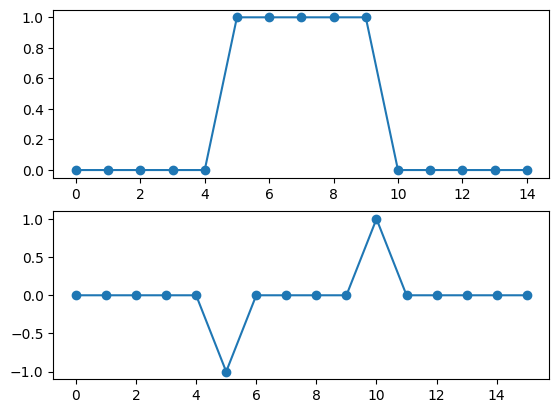

In [57]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(c, 'o-')

### Image filters with convolutions

In [80]:
%%capture
!pip install pooch

In [83]:
from scipy.ndimage import convolve
from scipy.signal import convolve2d
from scipy import misc

In [84]:
img = misc.ascent()

C:\Users\Prashant\AppData\Local\Temp\ipykernel_20048\494421066.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  img = misc.ascent()


In [85]:
img.shape

(512, 512)

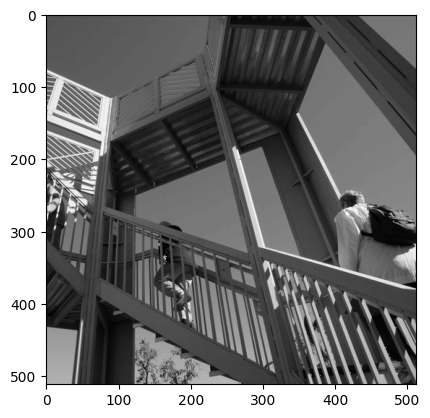

In [61]:
plt.imshow(img, cmap='gray')

In [62]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])


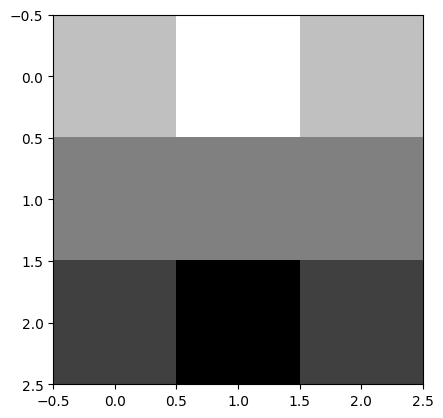

In [64]:
plt.imshow(h_kernel, cmap='gray')

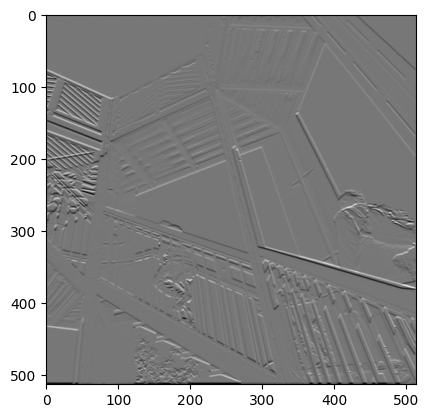

In [65]:
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray')

## Convolutional neural networks

In [91]:
from keras.layers import Conv2D, MaxPool2D

In [67]:
img.shape

(512, 512)

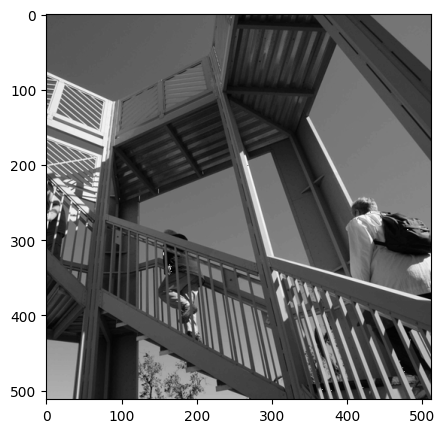

In [68]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [69]:
img_tensor = img.reshape((1, 512, 512, 1))

In [70]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [71]:
img_pred_tensor = model.predict(img_tensor)

1/1 [==============================] - 0s 127ms/step


In [72]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [73]:
img_pred = img_pred_tensor[0, :, :, 0]

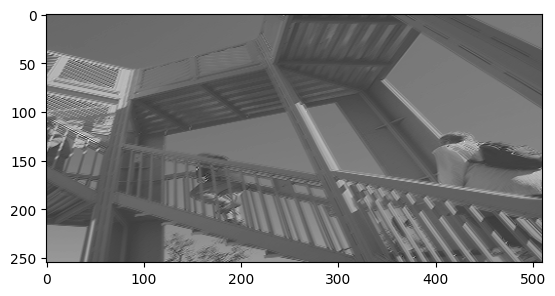

In [74]:
plt.imshow(img_pred, cmap='gray')

In [75]:
weights = model.get_weights()

In [112]:
weights[0].shape

(3, 3, 1, 1)

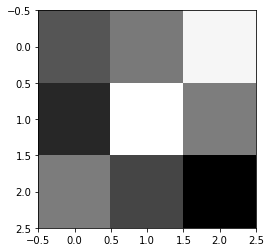

In [113]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [114]:
weights[0] = np.ones(weights[0].shape)

In [115]:
model.set_weights(weights)

In [116]:
img_pred_tensor = model.predict(img_tensor)

In [117]:
img_pred = img_pred_tensor[0, :, :, 0]

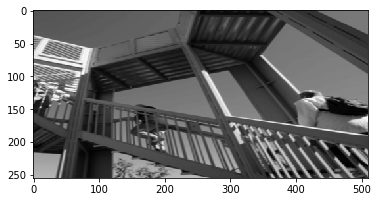

In [118]:
plt.imshow(img_pred, cmap='gray')

In [119]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 512, 512, 1)

## Pooling layers

In [36]:
from keras.layers import MaxPool2D, AvgPool2D

In [121]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [122]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

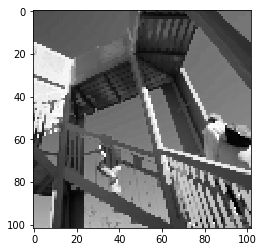

In [123]:
plt.imshow(img_pred, cmap='gray')

In [124]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

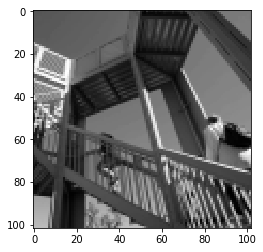

In [125]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

## Final architecture

In [86]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [87]:
X_train.shape

(60000, 28, 28, 1)

In [88]:
from keras.layers import Flatten, Activation, Dropout, GlobalAveragePooling2D

In [92]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())

# model.add(GlobalAveragePooling2D()) 
model.add(Dense(32, activation='relu')) # FC LAYER
model.add(Dense(10, activation='softmax')) # OUTPUT LAYER

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [93]:
13*13*32*32 + 32

173088

In [94]:
32*32 + 32

1056

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [96]:
model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
329/329 [==============================] - 6s 17ms/step - loss: 0.3975 - accuracy: 0.8868 - val_loss: 0.4295 - val_accuracy: 0.8553
Epoch 2/10
329/329 [==============================] - 7s 21ms/step - loss: 0.1472 - accuracy: 0.9573 - val_loss: 0.1624 - val_accuracy: 0.9503
Epoch 3/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0939 - accuracy: 0.9729 - val_loss: 0.1096 - val_accuracy: 0.9666
Epoch 4/10
329/329 [==============================] - 7s 22ms/step - loss: 0.0703 - accuracy: 0.9798 - val_loss: 0.1030 - val_accuracy: 0.9675
Epoch 5/10
329/329 [==============================] - 6s 18ms/step - loss: 0.0571 - accuracy: 0.9835 - val_loss: 0.0710 - val_accuracy: 0.9788
Epoch 6/10
329/329 [==============================] - 7s 23ms/step - loss: 0.0465 - accuracy: 0.9863 - val_loss: 0.1146 - val_accuracy: 0.9648
Epoch 7/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0400 - accuracy: 0.9881 - val_loss: 0.0743 - val_accuracy: 0.9769

In [67]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0511 - accuracy: 0.9844: 0s - loss: 0.0505 - accuracy: 0.98


[0.0510513037443161, 0.9843999743461609]

In [102]:
# summarize filter shapes
for layer in model.layers:
    print(layer.name)
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    else: print(layer.name)

conv2d
conv2d
max_pooling2d
flatten
dense
dense_1


In [99]:
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

dense_1 (32, 10)


In [100]:
filters

array([[ 0.02781877, -0.45923576, -0.41839913, -0.0089753 , -0.556054  ,
         0.07182282, -0.17925681,  0.19530907, -0.06539335,  0.14927965],
       [-0.15405056, -0.4001594 ,  0.4203272 , -0.4387013 ,  0.2881292 ,
         0.07786627, -0.5133347 , -0.12623848,  0.06499255,  0.06754235],
       [-0.4291364 ,  0.54624563, -0.37133816, -0.46021295,  0.19527762,
         0.41674307,  0.12768276, -0.33296305,  0.07863733, -0.36849847],
       [-0.27758664,  0.16808285, -0.7229649 ,  0.32340714,  0.02419462,
         0.18240304, -0.36171016,  0.24944343,  0.02280959,  0.3212868 ],
       [-0.4166198 ,  0.23440182,  0.36736295,  0.33984584, -0.60914993,
         0.19451058,  0.41643822,  0.10027602, -0.23539647, -0.86363435],
       [-0.20830177,  0.03542742, -0.3449289 ,  0.26053238, -0.3661613 ,
        -0.348331  ,  0.37486717,  0.04325181,  0.18561833,  0.2648251 ],
       [ 0.04377444, -0.12288047, -0.21924002,  0.32175905, -0.08710929,
         0.07343484, -0.29017618, -0.07957265

In [101]:
biases

array([-0.01049292,  0.08872589,  0.01137264, -0.01490755, -0.05916518,
        0.02830651, -0.03502764,  0.03693714, -0.01063087, -0.01090651],
      dtype=float32)

In [107]:
model.layers[3].name

'dense'

In [109]:
filters, biases = model.layers[3].get_weights()
print(layer.name, filters.shape)

dense_1 (5408, 32)


In [73]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
# model = VGG16()
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    print(filters[:,:,:,0])

conv2d (3, 3, 1, 32)
[[[ 0.02311013]
  [ 0.14146788]
  [-0.0606682 ]]

 [[-0.13519233]
  [ 0.13639829]
  [-0.01267294]]

 [[-0.08039843]
  [ 0.15200078]
  [ 0.02311106]]]


### Exercise 1
You've been hired by a shipping company to overhaul the way they route mail, parcels and packages. They want to build an image recognition system  capable of recognizing the digits in the zipcode on a package, so that it can be automatically routed to the correct location.
You are tasked to build the digit recognition system. Luckily, you can rely on the MNIST dataset for the intial training of your model!

Build a deep convolutional neural network with at least two convolutional and two pooling layers before the fully connected layer.

- Start from the network we have just built
- Insert a `Conv2D` layer after the first `MaxPool2D`, give it 64 filters.
- Insert a `MaxPool2D` after that one
- Insert an `Activation` layer
- retrain the model
- does performance improve?
- how many parameters does this new model have? More or less than the previous model? Why?
- how long did this second model take to train? Longer or shorter than the previous model? Why?
- did it perform better or worse than the previous model?

### Exercise 2

Pleased with your performance with the digits recognition task, your boss decides to challenge you with a harder task. Their online branch allows people to upload images to a website that generates and prints a postcard that is shipped to destination. Your boss would like to know what images people are loading on the site in order to provide targeted advertising on the same page, so he asks you to build an image recognition system capable of recognizing a few objects. Luckily for you, there's a dataset ready made with a collection of labeled images. This is the [Cifar 10 Dataset](http://www.cs.toronto.edu/~kriz/cifar.html), a very famous dataset that contains images for 10 different categories:

- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

In this exercise we will reach the limit of what you can achieve on your laptop and get ready for the next session on cloud GPUs.

Here's what you have to do:
- load the cifar10 dataset using `keras.datasets.cifar10.load_data()`
- display a few images, see how hard/easy it is for you to recognize an object with such low resolution
- check the shape of X_train, does it need reshape?
- check the scale of X_train, does it need rescaling?
- check the shape of y_train, does it need reshape?
- build a model with the following architecture, and choose the parameters and activation functions for each of the layers:
    - conv2d
    - conv2d
    - maxpool
    - conv2d
    - conv2d
    - maxpool
    - flatten
    - dense
    - output
- compile the model and check the number of parameters
- attempt to train the model with the optimizer of your choice. How fast does training proceed?
- If training is too slow (as expected) stop the execution and move to the next session!

In [110]:
from keras.datasets import cifar10

In [111]:
data = cifar10.load_data()

170498071/170498071 [==============================] - 181s 1us/step


In [1]:
2+3

5